In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
import csv
import re
import datetime
from numpy import median
pd.set_option('display.max_columns', None)

# Đọc dữ liệu từ file
Đọc từ file lên đã rồi làm gì thì làm :D 

In [2]:
user_df = pd.read_csv("data/user.csv")
playlist_df = pd.read_csv("data/playlist.csv")
track_df = pd.read_csv("data/track.csv")

In ra phần head của dữ liệu, lướt sơ qua và hiểu thông tin các cột.

In [3]:
user_df.head()

,avatar_url,city,comments_count,country_code,created_at,creator_subscriptions,creator_subscription,description,followers_count,followings_count,first_name,full_name,groups_count,id,kind,last_modified,last_name,likes_count,playlist_likes_count,permalink,permalink_url,playlist_count,reposts_count,track_count,uri,urn,username,verified,visuals,badges,station_urn,station_permalink
0,https://i1.sndcdn.com/avatars-000012778523-59q...,Berlin,463,DE,2007-09-22T14:21:00Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},Artist & Founder SoundCloud,133673,1270,Eric,Eric Wahlforss,0,183,user,2020-12-16T21:40:33Z,Wahlforss,306,10,forss,https://soundcloud.com/forss,4,NaN,26,https://api.soundcloud.com/users/183,soundcloud:users:183,Forss,True,"{'urn': 'soundcloud:users:183', 'enabled': Tru...","{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:183,artist-stations:183
1,https://i1.sndcdn.com/avatars-000000018772-c5d...,Tokyo,0,JP,2008-03-06T12:56:42Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},Floor Limit is the music label in Japan.We hav...,265,5,Ark,Ark Kozuki,0,1691,user,2020-08-17T12:33:59Z,Kozuki,3,0,ark,https://soundcloud.com/ark,3,NaN,5,https://api.soundcloud.com/users/1691,soundcloud:users:1691,ark,False,NaN,"{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:1691,artist-stations:1691
2,https://i1.sndcdn.com/avatars-000000018772-c5d...,Tokyo,0,JP,2008-03-06T12:56:42Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},Floor Limit is the music label in Japan.We hav...,265,5,Ark,Ark Kozuki,0,1691,user,2020-08-17T12:33:59Z,Kozuki,3,0,ark,https://soundcloud.com/ark,3,NaN,5,https://api.soundcloud.com/users/1691,soundcloud:users:1691,ark,False,NaN,"{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:1691,artist-stations:1691
3,https://i1.sndcdn.com/avatars-N3HNyXVCJnJ8YiLQ...,Tampere,241,FI,2008-04-19T17:43:00Z,[{'product': {'id': 'creator-pro-unlimited'}}],{'product': {'id': 'creator-pro-unlimited'}},I <3 synths. 1/2 of U&K. Host of Etkoplasma ra...,1502,2002,Kim,Kim,0,2157,user,2021-08-17T10:55:32Z,NaN,826,54,kimik,https://soundcloud.com/kimik,5,NaN,73,https://api.soundcloud.com/users/2157,soundcloud:users:2157,Kimik,False,"{'urn': 'soundcloud:users:2157', 'enabled': Tr...","{'pro': False, 'pro_unlimited': True, 'verifie...",soundcloud:system-playlists:artist-stations:2157,artist-stations:2157
4,https://i1.sndcdn.com/avatars-000000012820-990...,NaN,0,NaN,2008-03-08T00:32:42Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},Final Headphone Science album 'Frozen Love Amo...,877,6,NaN,NaN,0,1719,user,2017-09-07T21:15:46Z,NaN,1,0,headphonescience,https://soundcloud.com/headphonescience,4,NaN,46,https://api.soundcloud.com/users/1719,soundcloud:users:1719,Headphone Science,False,"{'urn': 'soundcloud:users:1719', 'enabled': Tr...","{'pro': False, 'pro_unlimited': False, 'verifi...",soundcloud:system-playlists:artist-stations:1719,artist-stations:1719


In [4]:
playlist_df.head()

,artwork_url,created_at,description,duration,embeddable_by,genre,id,kind,label_name,last_modified,license,likes_count,managed_by_feeds,permalink,permalink_url,public,purchase_title,purchase_url,release_date,reposts_count,secret_token,sharing,tag_list,title,uri,user_id,set_type,is_album,published_at,display_date,user,tracks,track_count
0,https://i1.sndcdn.com/artworks-000067273270-ui...,2008-04-30T01:21:15Z,My 2003 debut album made on the road with a la...,3247119,all,Electronic,18,playlist,sonarkollektiv,2021-07-21T10:53:42Z,all-rights-reserved,1544,False,soulhack,https://soundcloud.com/forss/sets/soulhack,True,NaN,http://www.sonarkollektiv.com/releases/SK006CD,2003-06-02T00:00:00Z,262,NaN,public,downtempo sampling beats,Soulhack,https://api.soundcloud.com/playlists/18,183,album,True,NaN,2008-04-30T01:21:15Z,{'avatar_url': 'https://i1.sndcdn.com/avatars-...,[{'artwork_url': 'https://i1.sndcdn.com/artwor...,11
1,NaN,2008-05-01T04:12:43Z,artist / noe\r\n,354742,all,ambient pop,32,playlist,Floor Limit,2015-10-13T13:39:25Z,all-rights-reserved,2,False,noe,https://soundcloud.com/ark/sets/noe,True,NaN,http://www.amazon.co.jp/beautiful-world-noe/dp...,2005-07-30T00:00:00Z,0,NaN,public,"ambient electronica IDM electropop japan ""girl...",noe - a beautiful world,https://api.soundcloud.com/playlists/32,1691,album,True,NaN,2008-05-01T04:12:43Z,{'avatar_url': 'https://i1.sndcdn.com/avatars-...,[],0
2,NaN,2008-05-01T04:13:55Z,NaN,254066,all,abstract hip-hop,33,playlist,Floor Limit,2015-10-13T13:35:10Z,all-rights-reserved,1,False,akt-the-jn,https://soundcloud.com/ark/sets/akt-the-jn,True,NaN,NaN,2005-06-29T00:00:00Z,0,NaN,public,"""hip hop"" abstract breakbeats",AKT THE JN - MIDNIGHT RAVERS RIDE ON,https://api.soundcloud.com/playlists/33,1691,album,True,NaN,2008-05-01T04:13:55Z,{'avatar_url': 'https://i1.sndcdn.com/avatars-...,"[{'artwork_url': None, 'caption': None, 'comme...",1
3,NaN,2008-05-01T17:31:06Z,NaN,50620378,all,NaN,34,playlist,NaN,2021-10-16T14:55:49Z,all-rights-reserved,1,False,dj-mixes,https://soundcloud.com/kimik/sets/dj-mixes,True,NaN,NaN,NaN,0,NaN,public,NaN,Dj Mixes,https://api.soundcloud.com/playlists/34,2157,NaN,False,NaN,2008-05-01T17:31:06Z,{'avatar_url': 'https://i1.sndcdn.com/avatars-...,[{'artwork_url': 'https://i1.sndcdn.com/artwor...,10
4,NaN,2008-05-05T03:06:57Z,songs i made for a rave i played at in 2007,2498158,all,smoke & chill,38,playlist,NaN,2015-10-13T13:39:25Z,all-rights-reserved,3,False,the-rave-songs,https://soundcloud.com/headphonescience/sets/t...,True,NaN,NaN,2007-01-01T00:00:00Z,1,NaN,public,NaN,the rave songs,https://api.soundcloud.com/playlists/38,1719,ep,True,NaN,2008-05-05T03:06:57Z,{'avatar_url': 'https://i1.sndcdn.com/avatars-...,"[{'artwork_url': None, 'caption': None, 'comme...",4


In [5]:
track_df.head()

,artwork_url,caption,commentable,comment_count,created_at,description,downloadable,download_count,duration,full_duration,embeddable_by,genre,has_downloads_left,id,kind,label_name,last_modified,license,likes_count,permalink,permalink_url,playback_count,public,publisher_metadata,purchase_title,purchase_url,release_date,reposts_count,secret_token,sharing,state,streamable,tag_list,title,track_format,uri,urn,user_id,visuals,waveform_url,display_date,media,station_urn,station_permalink,track_authorization,monetization_model,policy,user
0,https://i1.sndcdn.com/artworks-000067273298-mj...,NaN,True,104.0,2007-09-22T14:24:38Z,"Intro from the Soulhack Album, originally crea...",True,6531.0,142236,142236,all,Electronic,False,290,track,sonarkollektiv,2021-01-05T06:42:33Z,all-rights-reserved,332.0,city-ports,https://soundcloud.com/forss/city-ports,260313.0,True,"{'id': 290, 'urn': 'soundcloud:tracks:290', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00040,2003-06-02T00:00:00Z,31,NaN,public,finished,True,cinematic intro,City Ports,single-track,https://api.soundcloud.com/tracks/290,soundcloud:tracks:290,183,NaN,https://wave.sndcdn.com/UiLhla0Ho0Ad_m.json,2007-09-22T14:24:38Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:290,track-stations:290,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW,{'avatar_url': 'https://i1.sndcdn.com/avatars-...
1,https://i1.sndcdn.com/artworks-000067273301-we...,NaN,True,176.0,2007-09-22T14:32:59Z,From the Soulhack album,True,7288.0,274442,274442,all,Electronic,False,291,track,sonarkollektiv,2020-03-19T06:15:34Z,all-rights-reserved,1068.0,soulhack,https://soundcloud.com/forss/soulhack,286623.0,True,"{'id': 291, 'urn': 'soundcloud:tracks:291', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-02-01001,2003-06-02T00:00:00Z,84,NaN,public,finished,True,jazz,Soulhack,single-track,https://api.soundcloud.com/tracks/291,soundcloud:tracks:291,183,NaN,https://wave.sndcdn.com/AqFIRCAP7Arw_m.json,2007-09-22T14:32:59Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:291,track-stations:291,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW,{'avatar_url': 'https://i1.sndcdn.com/avatars-...
2,https://i1.sndcdn.com/artworks-000067273305-sn...,NaN,True,68.0,2007-09-22T14:41:54Z,From the Soulhack album,True,3942.0,463908,463908,all,Electronic,False,292,track,sonarkollektiv,2020-03-19T06:08:42Z,all-rights-reserved,596.0,funk-for-nerds,https://soundcloud.com/forss/funk-for-nerds,234596.0,True,"{'id': 292, 'urn': 'soundcloud:tracks:292', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00041,2003-06-02T00:00:00Z,62,NaN,public,finished,True,jazz,Funk for Nerds,single-track,https://api.soundcloud.com/tracks/292,soundcloud:tracks:292,183,NaN,https://wave.sndcdn.com/EsdplDAYufuQ_m.json,2007-09-22T14:41:54Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:292,track-stations:292,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW,{'avatar_url': 'https://i1.sndcdn.com/avatars-...
3,https://i1.sndcdn.com/artworks-000067273316-sm...,NaN,True,613.0,2007-09-22T14:45:46Z,"From the Soulhack album,&nbsp;recently feature...",True,17514.0,213890,213890,all,Electronic,False,293,track,sonarkollektiv,2021-11-29T17:04:11Z,all-rights-reserved,2570.0,flickermood,https://soundcloud.com/forss/flickermood,947286.0,True,"{'id': 293, 'urn': 'soundcloud:tracks:293', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00042,2003-06-02T00:00:00Z,400,NaN,public,finished,True,downtempo,Flickermood,single-track,https://api.soundcloud.com/tracks/293,soundcloud:tracks:293,183,NaN,https://wave.sndcdn.com/cWHNerOLlkUq_m.json,2007-09-22T14:45:46Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:293,track-stations:293,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW,{'avatar_url': 'https://i1.sndcdn.

Ta thấy rằng cột đầu tiên chứa url dẫn tới hình ảnh avatar, artwork,... là không cần thiết trong việc phân tích dữ liệu (trừ khi ta phân tích dữ liệu ảnh, điều mà sẽ không diễn ra trong đồ án này).  
Vì vậy, phần cột dữ liệu ấy sẽ được bỏ đi đầu tiên.
**Lưu ý : chỉ chạy ô bên dưới 1 lần duy nhất, vì khi chạy lần thứ 2, cột cần xóa sẽ không tồn tại trong dataframe nữa, khi đó hàm xóa không tìm thấy cốt cần xóa sẽ báo lỗi**

In [6]:
try:
    track_df = track_df.drop(columns=['artwork_url'])
except:
    pass
try:
    user_df = user_df.drop(columns=['avatar_url'])
except:
    pass
try:
    playlist_df = playlist_df.drop(columns=['artwork_url'])
except:
    pass

Điểm qua xem có bao nhiều dòng ở mỗi tập dữ liệu :

In [7]:
print("Số dòng của track : {}".format(len(track_df)))
print("Số dòng của play list : {}".format(len(playlist_df)))
print("Số dòng của user : {}".format(len(user_df)))

Số dòng của track : 4854
Số dòng của play list : 1011
Số dòng của user : 1011


# Xác định cột khóa chính, loại bỏ cột không cần thiết và loại bỏ dòng trùng
Để loại bỏ những dòng bị trùng, đầu tiên ta phải xác định cột ID/khóa chính (cột định danh của mỗi bảng dữ liệu), vì đó là cơ sở để xem xét các dòng có bị trùng không.

## Tập dữ liệu user
- Với tập dữ liệu user, ta thấy có 3 trường là `uri`,`urn`,`username`,`permalink_url`,`id` là ba cột nếu xét trên ý nghĩa thực tế là ba cột khóa chính (tức mỗi record sẽ có 1 giá trị phân biệt ở cột này).Ba cột đều có thể trở thành khóa chính.  
- Tuy nhiên, khi xét trên công việc phân tích dữ liệu, cột `uri` và `urn` không mang ý nghĩa lắm vì 2 trường đó là url của API.  
- Cột `permalink_url` là cột có thể suy ra từ `username`, hay nói cách khác từ `username` có thể suy dẫn ra `permalink_url`, điều này sẽ khiến cho thông tin bị trùng lắp, dư thừa và không hiệu quả khi đưa vào mô hình để phân tích dữ liệu. Thực tế, ta có thể phát hiện việc này qua mô hình xác suất (ở đây ta phát hiện bằng cách dò bằng mắt). Tuy nhiên, độ lớn của đồ án chưa đủ để chúng ta cần dùng đến mô hình ấy :).  
- Cột `user_name` có vẻ cần thiết. Tuy nhiên, khi phân tích dữ liệu, khóa chính cần phải càng đơn giản càng tốt. Rõ ràng, `user_name` so với `id` thì không thể bằng trong việc định tính đối tượng/record. Về mặt thông tin, `user_name` cũng không thể so với cột `full_name` vì rõ ràng `full_name` cho cả họ lẫn tên, còn username chỉ là biệt danh, sẽ phân tích được gì từ dữ liêu biệt danh của người dùng chứ? Qua phân tích này, ta thấy cột `first_name` cũng khá thừa thãi nên sẽ loại bỏ nó luôn.
- Những cột như : `station_urn`, `station_permalink` đều suy ra được từ `id`
Vì vậy, ta để lại `id` làm khóa chính.

In [8]:
user_df = user_df.drop(columns=['uri','urn','permalink_url','station_permalink','permalink','username','station_urn'])

- Sau đó, ta tiến hành loại bỏ dòng trùng dựa vào cột `id`.
- Trước đó bảng user có 1011 dòng. 
- Ta sẽ xem xét sau khi loại bỏ dòng trùng dựa vào id thì còn bao nhiêu.
- Ngoài ra, ta sẽ so sánh khi loại bỏ dòng trùng khi dựa vào `id` với khi loại bỏ dòng trùng dựa vào dữ liệu của nguyên cột (tức tất cả các cột giống nhau hết mới xem là trùng) xem nhận xét `id` là khóa chính có đúng không.


In [9]:
print("Loại bỏ dòng trùng dựa vào cả dòng : {}".format(len(user_df.drop_duplicates())))
user_df = user_df.drop_duplicates(subset=['id'])
print("Loại bỏ dòng rùng dựa vào cột id :{}".format(len(user_df)))

Loại bỏ dòng trùng dựa vào cả dòng : 694
Loại bỏ dòng rùng dựa vào cột id :694


Như đã thấy, dòng `id` chính xác là khóa chính chúng ta cần tìm. Ta sẽ cho cột `id` index column trong dataframe để dễ xử lý cho các bước sau.

In [10]:
user_df =user_df.set_index('id')

## Tập dữ liệu play list

Giống như khi làm với tập user, chúng ta cũng sẽ loại bỏ những dòng unique nhưng không cung cấp thông tin cần thiết cho việc phân tích dữ liệu.
- `id` : Đầu tiên, ta thấy cột `id` làm rất tốt việc định danh từng record một cách đơn giản là đánh số.
- `permalink`,`user`,`permalink_url` : Có thể cung cấp thông tin về user và định danh track. Tuy vậy, ta có thể dùng cột `user_id` để cung cấp thông tin về user sở hữu track hiệu quả hơn.
- `uri`:định danh không tốt bằng `id`
Bước cho cột `id` là khóa chính thực hiện giống như mục 2.1.

In [11]:
playlist_df = playlist_df.drop(columns = ['permalink','permalink_url','permalink','user','uri'])

In [12]:
print("Xóa cột trùng theo dòng : {}".format(len(playlist_df.drop_duplicates())))
playlist_df = playlist_df.drop_duplicates(['id'])
print("Xóa cột trùng theo id : {}".format(len(playlist_df)))
playlist_df = playlist_df.set_index('id')


Xóa cột trùng theo dòng : 1011
Xóa cột trùng theo id : 1011


## Tập dữ liệu Track
Sẽ có 3 cột được loại bỏ:
- `permalink`,`permalink_url`,`uri`,`urn`,`user` : giống như những mục trên
Cột đưa ra lựa chọn khó nhất chính là `publisher_metadata` bởi ta không biết liệu ở công đoạn sau, người xử lý có cần những dữ liệu thể hiện các mối quan hệ giữa publisher và bài hát hay không. Cho nên quyết định cuối cùng là giữ lại cho chắc. 

In [13]:
track_df = track_df.drop(columns=['permalink','permalink_url','uri','urn','user'])

In [14]:
print("Xóa cột trùng theo dòng : {}".format(len(track_df.drop_duplicates())))
track_df = track_df.drop_duplicates(['id'])
print("Xóa cột trùng theo id : {}".format(len(track_df)))
track_df.set_index('id')

Xóa cột trùng theo dòng : 4732
Xóa cột trùng theo id : 4732


,caption,commentable,comment_count,created_at,description,downloadable,download_count,duration,full_duration,embeddable_by,genre,has_downloads_left,kind,label_name,last_modified,license,likes_count,playback_count,public,publisher_metadata,purchase_title,purchase_url,release_date,reposts_count,secret_token,sharing,state,streamable,tag_list,title,track_format,user_id,visuals,waveform_url,display_date,media,station_urn,station_permalink,track_authorization,monetization_model,policy
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
290,NaN,True,104.0,2007-09-22T14:24:38Z,"Intro from the Soulhack Album, originally crea...",True,6531.0,142236,142236,all,Electronic,False,track,sonarkollektiv,2021-01-05T06:42:33Z,all-rights-reserved,332.0,260313.0,True,"{'id': 290, 'urn': 'soundcloud:tracks:290', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00040,2003-06-02T00:00:00Z,31,NaN,public,finished,True,cinematic intro,City Ports,single-track,183,NaN,https://wave.sndcdn.com/UiLhla0Ho0Ad_m.json,2007-09-22T14:24:38Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:290,track-stations:290,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
291,NaN,True,176.0,2007-09-22T14:32:59Z,From the Soulhack album,True,7288.0,274442,274442,all,Electronic,False,track,sonarkollektiv,2020-03-19T06:15:34Z,all-rights-reserved,1068.0,286623.0,True,"{'id': 291, 'urn': 'soundcloud:tracks:291', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-02-01001,2003-06-02T00:00:00Z,84,NaN,public,finished,True,jazz,Soulhack,single-track,183,NaN,https://wave.sndcdn.com/AqFIRCAP7Arw_m.json,2007-09-22T14:32:59Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:291,track-stations:291,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
292,NaN,True,68.0,2007-09-22T14:41:54Z,From the Soulhack album,True,3942.0,463908,463908,all,Electronic,False,track,sonarkollektiv,2020-03-19T06:08:42Z,all-rights-reserved,596.0,234596.0,True,"{'id': 292, 'urn': 'soundcloud:tracks:292', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00041,2003-06-02T00:00:00Z,62,NaN,public,finished,True,jazz,Funk for Nerds,single-track,183,NaN,https://wave.sndcdn.com/EsdplDAYufuQ_m.json,2007-09-22T14:41:54Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:292,track-stations:292,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
293,NaN,True,613.0,2007-09-22T14:45:46Z,"From the Soulhack album,&nbsp;recently feature...",True,17514.0,213890,213890,all,Electronic,False,track,sonarkollektiv,2021-11-29T17:04:11Z,all-rights-reserved,2570.0,947286.0,True,"{'id': 293, 'urn': 'soundcloud:tracks:293', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00042,2003-06-02T00:00:00Z,400,NaN,public,finished,True,downtempo,Flickermood,single-track,183,NaN,https://wave.sndcdn.com/cWHNerOLlkUq_m.json,2007-09-22T14:45:46Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:293,track-stations:293,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
294,NaN,True,31.0,2007-09-22T15:00:17Z,From the Soulhack album,True,3134.0,291395,291395,all,Electronic,False,track,sonarkollektiv,2019-06-12T15:07:06Z,all-rights-reserved,261.0,202039.0,True,"{'id': 294, 'urn': 'soundcloud:tracks:294', 'a...",NaN,http://sonarkollektiv.com/tracks/DE-P96-03-00002,2003-06-02T00:00:00Z,23,NaN,public,finished,True,samples,Using Splashes,single-track,183,NaN,https://wave.sndcdn.com/hrNkZJd9Tjx4_m.json,2007-09-22T15:00:17Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:294,track-stations:294,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111915,NaN,True,0.0,2009-01-14T23:45:40Z

Như vậy, ta giảm được xấp xỉ 100 dòng so với ban đầu.

# Xử lý giá trị thiếu
Với những cột thiếu dữ liệu, ta có hai hướng xử lý : 
- Hoặc bỏ cột ấy đi
- Hoặc xây dựng một mô hình suy diễn điền vào các gía trị thiếu. 
 
Với những cột có dữ liệu thiếu quá nhiều, vượt ngưỡng 50%, thì việc điền vào các giá trị thiếu bằng mô hình có thể sẽ không chính xác, ảnh hưởng đến các bước phân tích về sau nghiêm trọng.
Vì vậy, những cột có giá trị thiếu >50% đều sẽ bị loại bỏ!

In [15]:
percent = 50.0
min_count = int((100-percent)/100*playlist_df.shape[0]+1)
playlist_df = playlist_df.dropna(axis=1,thresh=min_count)
track_df = track_df.dropna(axis=1,thresh=min_count)
user_df = user_df.dropna(axis=1,thresh=min_count)

# Chuyển đổi dữ liệu về kiểu phù hợp

## Dữ liệu user
Đầu tiên ta xem sơ qua những kiểu dữ liệu của `user`

In [16]:
print(user_df.dtypes)
user_df.head()

city                     object
comments_count            int64
country_code             object
created_at               object
creator_subscriptions    object
creator_subscription     object
followers_count           int64
followings_count          int64
groups_count              int64
kind                     object
last_modified            object
likes_count               int64
playlist_likes_count      int64
playlist_count            int64
track_count               int64
verified                   bool
badges                   object
dtype: object


,city,comments_count,country_code,created_at,creator_subscriptions,creator_subscription,followers_count,followings_count,groups_count,kind,last_modified,likes_count,playlist_likes_count,playlist_count,track_count,verified,badges
id,,,,,,,,,,,,,,,,,
183,Berlin,463,DE,2007-09-22T14:21:00Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},133673,1270,0,user,2020-12-16T21:40:33Z,306,10,4,26,True,"{'pro': False, 'pro_unlimited': False, 'verifi..."
1691,Tokyo,0,JP,2008-03-06T12:56:42Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},265,5,0,user,2020-08-17T12:33:59Z,3,0,3,5,False,"{'pro': False, 'pro_unlimited': False, 'verifi..."
2157,Tampere,241,FI,2008-04-19T17:43:00Z,[{'product': {'id': 'creator-pro-unlimited'}}],{'product': {'id': 'creator-pro-unlimited'}},1502,2002,0,user,2021-08-17T10:55:32Z,826,54,5,73,False,"{'pro': False, 'pro_unlimited': True, 'verifie..."
1719,NaN,0,NaN,2008-03-08T00:32:42Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},877,6,0,user,2017-09-07T21:15:46Z,1,0,4,46,False,"{'pro': False, 'pro_unlimited': False, 'verifi..."
2455,Borlänge,9,SE,2008-05-14T19:44:36Z,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},209,46,0,user,2015-10-18T13:05:36Z,33,5,4,29,False,"{'pro': False, 'pro_unlimited': False, 'verifi..."


Ta nhận thấy dữ liệu cột `create_at`,`last_modified` có định dạng ngày tháng năm nhưng được biểu diễn dưới dạng object

In [17]:
user_df['created_at'] = pd.to_datetime(user_df['created_at'])
user_df['last_modified'] = pd.to_datetime(user_df['last_modified'])

## Dữ liệu playlist
Đầu tiên ta xem sơ qua những kiểu dữ liệu của `playlist`

In [18]:
print(playlist_df.dtypes)
playlist_df.head()

created_at          object
description         object
duration             int64
embeddable_by       object
kind                object
last_modified       object
license             object
likes_count          int64
managed_by_feeds      bool
public                bool
reposts_count        int64
sharing             object
title               object
user_id              int64
is_album              bool
display_date        object
tracks              object
track_count          int64
dtype: object


,created_at,description,duration,embeddable_by,kind,last_modified,license,likes_count,managed_by_feeds,public,reposts_count,sharing,title,user_id,is_album,display_date,tracks,track_count
id,,,,,,,,,,,,,,,,,,
18,2008-04-30T01:21:15Z,My 2003 debut album made on the road with a la...,3247119,all,playlist,2021-07-21T10:53:42Z,all-rights-reserved,1544,False,True,262,public,Soulhack,183,True,2008-04-30T01:21:15Z,[{'artwork_url': 'https://i1.sndcdn.com/artwor...,11
32,2008-05-01T04:12:43Z,artist / noe\r\n,354742,all,playlist,2015-10-13T13:39:25Z,all-rights-reserved,2,False,True,0,public,noe - a beautiful world,1691,True,2008-05-01T04:12:43Z,[],0
33,2008-05-01T04:13:55Z,NaN,254066,all,playlist,2015-10-13T13:35:10Z,all-rights-reserved,1,False,True,0,public,AKT THE JN - MIDNIGHT RAVERS RIDE ON,1691,True,2008-05-01T04:13:55Z,"[{'artwork_url': None, 'caption': None, 'comme...",1
34,2008-05-01T17:31:06Z,NaN,50620378,all,playlist,2021-10-16T14:55:49Z,all-rights-reserved,1,False,True,0,public,Dj Mixes,2157,False,2008-05-01T17:31:06Z,[{'artwork_url': 'https://i1.sndcdn.com/artwor...,10
38,2008-05-05T03:06:57Z,songs i made for a rave i played at in 2007,2498158,all,playlist,2015-10-13T13:39:25Z,all-rights-reserved,3,False,True,1,public,the rave songs,1719,True,2008-05-05T03:06:57Z,"[{'artwork_url': None, 'caption': None, 'comme...",4


Ta thấy các cột `created_at`,`last_modified`,`display_date` cần được chuyển sang định dạng ngày tháng năm để dễ xử lý

In [19]:
playlist_df['created_at'] = pd.to_datetime(playlist_df['created_at'])
playlist_df['last_modified'] = pd.to_datetime(playlist_df['last_modified'])
playlist_df['display_date'] = pd.to_datetime(playlist_df['display_date'])

## Dữ liệu track
Đầu tiên ta xem sơ qua những kiểu dữ liệu của `track`

In [20]:
print(track_df.dtypes)
track_df.head()

commentable               bool
comment_count          float64
created_at              object
description             object
downloadable              bool
download_count         float64
duration                 int64
full_duration            int64
embeddable_by           object
genre                   object
has_downloads_left        bool
id                       int64
kind                    object
label_name              object
last_modified           object
license                 object
likes_count            float64
playback_count         float64
public                    bool
publisher_metadata      object
purchase_url            object
release_date            object
reposts_count            int64
sharing                 object
state                   object
streamable                bool
tag_list                object
title                   object
track_format            object
user_id                  int64
waveform_url            object
display_date            object
media   

,commentable,comment_count,created_at,description,downloadable,download_count,duration,full_duration,embeddable_by,genre,has_downloads_left,id,kind,label_name,last_modified,license,likes_count,playback_count,public,publisher_metadata,purchase_url,release_date,reposts_count,sharing,state,streamable,tag_list,title,track_format,user_id,waveform_url,display_date,media,station_urn,station_permalink,track_authorization,monetization_model,policy
0,True,104.0,2007-09-22T14:24:38Z,"Intro from the Soulhack Album, originally crea...",True,6531.0,142236,142236,all,Electronic,False,290,track,sonarkollektiv,2021-01-05T06:42:33Z,all-rights-reserved,332.0,260313.0,True,"{'id': 290, 'urn': 'soundcloud:tracks:290', 'a...",http://sonarkollektiv.com/tracks/DE-P96-03-00040,2003-06-02T00:00:00Z,31,public,finished,True,cinematic intro,City Ports,single-track,183,https://wave.sndcdn.com/UiLhla0Ho0Ad_m.json,2007-09-22T14:24:38Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:290,track-stations:290,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
1,True,176.0,2007-09-22T14:32:59Z,From the Soulhack album,True,7288.0,274442,274442,all,Electronic,False,291,track,sonarkollektiv,2020-03-19T06:15:34Z,all-rights-reserved,1068.0,286623.0,True,"{'id': 291, 'urn': 'soundcloud:tracks:291', 'a...",http://sonarkollektiv.com/tracks/DE-P96-02-01001,2003-06-02T00:00:00Z,84,public,finished,True,jazz,Soulhack,single-track,183,https://wave.sndcdn.com/AqFIRCAP7Arw_m.json,2007-09-22T14:32:59Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:291,track-stations:291,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
2,True,68.0,2007-09-22T14:41:54Z,From the Soulhack album,True,3942.0,463908,463908,all,Electronic,False,292,track,sonarkollektiv,2020-03-19T06:08:42Z,all-rights-reserved,596.0,234596.0,True,"{'id': 292, 'urn': 'soundcloud:tracks:292', 'a...",http://sonarkollektiv.com/tracks/DE-P96-03-00041,2003-06-02T00:00:00Z,62,public,finished,True,jazz,Funk for Nerds,single-track,183,https://wave.sndcdn.com/EsdplDAYufuQ_m.json,2007-09-22T14:41:54Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:292,track-stations:292,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
3,True,613.0,2007-09-22T14:45:46Z,"From the Soulhack album,&nbsp;recently feature...",True,17514.0,213890,213890,all,Electronic,False,293,track,sonarkollektiv,2021-11-29T17:04:11Z,all-rights-reserved,2570.0,947286.0,True,"{'id': 293, 'urn': 'soundcloud:tracks:293', 'a...",http://sonarkollektiv.com/tracks/DE-P96-03-00042,2003-06-02T00:00:00Z,400,public,finished,True,downtempo,Flickermood,single-track,183,https://wave.sndcdn.com/cWHNerOLlkUq_m.json,2007-09-22T14:45:46Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:293,track-stations:293,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
4,True,31.0,2007-09-22T15:00:17Z,From the Soulhack album,True,3134.0,291395,291395,all,Electronic,False,294,track,sonarkollektiv,2019-06-12T15:07:06Z,all-rights-reserved,261.0,202039.0,True,"{'id': 294, 'urn': 'soundcloud:tracks:294', 'a...",http://sonarkollektiv.com/tracks/DE-P96-03-00002,2003-06-02T00:00:00Z,23,public,finished,True,samples,Using Splashes,single-track,183,https://wave.sndcdn.com/hrNkZJd9Tjx4_m.json,2007-09-22T15:00:17Z,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:294,track-stations:294,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW


Có 2 vấn đề cần xử lý ở dữ liệu `user` : 
- Chuyển các cột `created_at`,`release_date` và `last_modified` sang dạng ngày tháng năm.
- Chuyển các cột có đáng ra có dữ liệu int nhưng lại mang dữ liệu float

In [21]:
# chuyển ngày làm tương tự như 2 tập dữ liệu trên
track_df['created_at'] = pd.to_datetime(track_df['created_at'])
track_df['last_modified'] = pd.to_datetime(track_df['last_modified'])
track_df['release_date'] = pd.to_datetime(track_df['release_date'])
track_df['display_date'] = pd.to_datetime(track_df['display_date'])

Xem các cột có dữ liệu float

In [22]:
dtypes = track_df.dtypes
dtypes
float_cols = (dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
float_cols
# track_cols_float = set(track_dypte[(track_dypte==np.float_)])
# track_cols_float

Index(['comment_count', 'download_count', 'likes_count', 'playback_count'], dtype='object')

Ta thấy các dữ liệu này đều là biến đếm (đếm số lượng download, comment) và phải mang kiểu dữ liệu là Int. Tuy nhiên các biến này lại mang dữ liệu float, sẽ gây khó khăn khi thực hiện phân tích dữ liệu. Vì vậy ta sẽ chuyển chúng sang Int.

In [23]:
track_df[float_cols] = track_df[float_cols].astype('Int64')

# Đặt câu hỏi

## **Câu 1: Thể loại nhạc của track phổ biến nào có lượt nghe trung bình nhiều nhất trên Soundcloud?**

**Trả lời được câu hỏi này** giúp ta nắm bắt được thể loại nhạc phổ biến được ưa chuộng trên thế giới. Từ thông tin đó, ta có thể xác định được thể loại nhạc nào đang phổ biến để đón đầu xu thế.

**Để trả lời được câu hỏi trên** ta dựa vào cột **genre** và một trong những cột **playback_count**.

Trước tiên ta cần phân tích cột genre và cột playback_count.

### Kiểm tra dữ liệu đã thu thập được

In [24]:
track_df.head()

,commentable,comment_count,created_at,description,downloadable,download_count,duration,full_duration,embeddable_by,genre,has_downloads_left,id,kind,label_name,last_modified,license,likes_count,playback_count,public,publisher_metadata,purchase_url,release_date,reposts_count,sharing,state,streamable,tag_list,title,track_format,user_id,waveform_url,display_date,media,station_urn,station_permalink,track_authorization,monetization_model,policy
0,True,104,2007-09-22 14:24:38+00:00,"Intro from the Soulhack Album, originally crea...",True,6531,142236,142236,all,Electronic,False,290,track,sonarkollektiv,2021-01-05 06:42:33+00:00,all-rights-reserved,332,260313,True,"{'id': 290, 'urn': 'soundcloud:tracks:290', 'a...",http://sonarkollektiv.com/tracks/DE-P96-03-00040,2003-06-02 00:00:00+00:00,31,public,finished,True,cinematic intro,City Ports,single-track,183,https://wave.sndcdn.com/UiLhla0Ho0Ad_m.json,2007-09-22 14:24:38+00:00,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:290,track-stations:290,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
1,True,176,2007-09-22 14:32:59+00:00,From the Soulhack album,True,7288,274442,274442,all,Electronic,False,291,track,sonarkollektiv,2020-03-19 06:15:34+00:00,all-rights-reserved,1068,286623,True,"{'id': 291, 'urn': 'soundcloud:tracks:291', 'a...",http://sonarkollektiv.com/tracks/DE-P96-02-01001,2003-06-02 00:00:00+00:00,84,public,finished,True,jazz,Soulhack,single-track,183,https://wave.sndcdn.com/AqFIRCAP7Arw_m.json,2007-09-22 14:32:59+00:00,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:291,track-stations:291,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
2,True,68,2007-09-22 14:41:54+00:00,From the Soulhack album,True,3942,463908,463908,all,Electronic,False,292,track,sonarkollektiv,2020-03-19 06:08:42+00:00,all-rights-reserved,596,234596,True,"{'id': 292, 'urn': 'soundcloud:tracks:292', 'a...",http://sonarkollektiv.com/tracks/DE-P96-03-00041,2003-06-02 00:00:00+00:00,62,public,finished,True,jazz,Funk for Nerds,single-track,183,https://wave.sndcdn.com/EsdplDAYufuQ_m.json,2007-09-22 14:41:54+00:00,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:292,track-stations:292,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
3,True,613,2007-09-22 14:45:46+00:00,"From the Soulhack album,&nbsp;recently feature...",True,17514,213890,213890,all,Electronic,False,293,track,sonarkollektiv,2021-11-29 17:04:11+00:00,all-rights-reserved,2570,947286,True,"{'id': 293, 'urn': 'soundcloud:tracks:293', 'a...",http://sonarkollektiv.com/tracks/DE-P96-03-00042,2003-06-02 00:00:00+00:00,400,public,finished,True,downtempo,Flickermood,single-track,183,https://wave.sndcdn.com/cWHNerOLlkUq_m.json,2007-09-22 14:45:46+00:00,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:293,track-stations:293,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW
4,True,31,2007-09-22 15:00:17+00:00,From the Soulhack album,True,3134,291395,291395,all,Electronic,False,294,track,sonarkollektiv,2019-06-12 15:07:06+00:00,all-rights-reserved,261,202039,True,"{'id': 294, 'urn': 'soundcloud:tracks:294', 'a...",http://sonarkollektiv.com/tracks/DE-P96-03-00002,2003-06-02 00:00:00+00:00,23,public,finished,True,samples,Using Splashes,single-track,183,https://wave.sndcdn.com/hrNkZJd9Tjx4_m.json,2007-09-22 15:00:17+00:00,{'transcodings': [{'url': 'https://api-v2.soun...,soundcloud:system-playlists:track-stations:294,track-stations:294,eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJnZW8iO...,NOT_APPLICABLE,ALLOW


In [25]:
track_df.shape

(4732, 38)

### Tiền xử lý dữ liệu

Tên các thể loại nhạc chưa theo một cấu trúc nhất định và tồn tại một số tên 'rác', ta cần tiến hành tiền xử lí các tên không hợp lệ đó.

In [26]:
# Xử lý ký tự đặc biệt
track_df['genre'] = track_df['genre'].str.strip()
track_df['genre'] = track_df['genre'].str.strip('#')
track_df['genre'] = track_df['genre'].str.strip('?')
track_df['genre'] = track_df['genre'].str.strip(':)')
track_df['genre'] = track_df['genre'].str.strip('+ o -')
track_df['genre'] = track_df['genre'].str.strip(',')
track_df['genre'] = track_df['genre'].str.strip('[')
track_df['genre'] = track_df['genre'].str.strip(']')
track_df['genre'] = track_df['genre'].str.replace(r'\\',"/")

# Định dạng chữ
track_df['genre'] = track_df['genre'].str.lower()
track_df['genre'] = track_df['genre'].str.capitalize()

C:\Users\DELL\AppData\Local\Temp/ipykernel_1220/1253588951.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  track_df['genre'] = track_df['genre'].str.replace(r'\\',"/")


In [27]:
#Xử lý các dòng không phải là genre
def process_not_genre(val):
    if not pd.isna(val):
        if val=='' or val == 'A' or val.find('mp3') != -1 or val.find(']') != -1 or val.find('recordings') != -1 or val.find('Album') != -1:
            val = np.nan
    return val
track_df['genre'] = track_df['genre'].apply(process_not_genre)

#Bỏ các dòng nan
track_df.dropna(subset=['genre'], how='all', inplace=True)

### Kiểm tra các giá trị dạng số được phân bố ra sao

In [28]:
num_type_col = track_df.select_dtypes(include=[np.number])
#Loại bỏ các cột mang giá trị định danh
num_type_col = num_type_col.drop(columns=['id','user_id'])

num_type_col_info = num_type_col.describe().loc[['count','mean','min','25%','50%','75%','max']].round(1)
num_type_col_info

,comment_count,download_count,duration,full_duration,likes_count,playback_count,reposts_count
count,2971.0,2975.0,2986.0,2986.0,2975.0,2975.0,2986.0
mean,7.8,127.1,1207507.5,1207507.5,64.4,4561.2,8.4
min,0.0,0.0,470.0,470.0,0.0,4.0,0.0
25%,0.0,0.0,228527.2,228527.2,1.0,206.0,0.0
50%,2.0,0.0,354180.5,354180.5,6.0,608.0,0.0
75%,7.0,59.5,530036.8,530036.8,30.0,1906.0,2.0
max,613.0,22702.0,18196670.0,18196670.0,6083.0,947286.0,834.0


In [29]:
#Giá trị trung vị 
med = num_type_col.median()
med

comment_count          2.0
download_count         0.0
duration          354180.5
full_duration     354180.5
likes_count            6.0
playback_count       608.0
reposts_count          0.0
dtype: float64

Ta nhận thấy cột **duration** và **full_duration** có các đại lượng trong thống kê mô tả khá giống nhau, ta tiến hành loại bỏ cột full_duration.

In [30]:
num_type_col = num_type_col.drop(columns=['full_duration'])
num_type_col.head()

,comment_count,download_count,duration,likes_count,playback_count,reposts_count
0,104,6531,142236,332,260313,31
1,176,7288,274442,1068,286623,84
2,68,3942,463908,596,234596,62
3,613,17514,213890,2570,947286,400
4,31,3134,291395,261,202039,23


### Kiểm tra mối tương quan giữa các thuộc tính

Tiến hành trực quan hóa mối quan hệ giữa các thuộc tính này. 

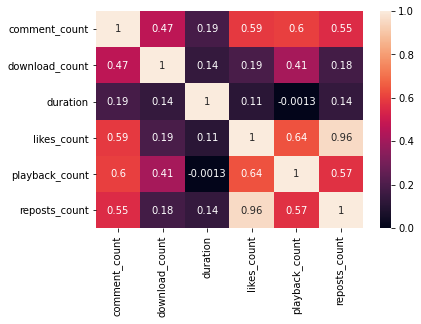

In [31]:
corelation = num_type_col.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True);

Nhìn vào biểu đồ, ta thấy các ô tập trung nhiều màu đỏ nhất là các ô nằm trong thuộc tính playback_count.

Ta có thể thấy những thuộc tính comment_count, likes_count, repost_count có mức độ tương đồng rất lớn với thuộc tính playback_count. Hay có thể nói, một track nhạc được nghe nhiều thì thường sẽ đi cùng với việc track nhạc đó sẽ được nhiều bình luận, được thích nhiều và được chia sẻ nhiều. Do đó giá trị playback_count quyết định rất nhiều vào sự phổ biến của track nhạc

*Vậy nên dùng cột **playback_count** để phân tích sẽ cho kết quả có tính chính xác khá cao .*

### Tìm thể loại nhạc phổ biến có lượt nghe trung bình nhiều nhất

Do tập dữ liệu genre quá lớn (724 giá trị khác nhau), ta sẽ tìm thể loại nhạc có lượt nghe trung bình nhiều nhất với 20 thể loại nhạc phổ biến nhất.

In [32]:
pd.set_option('display.max_rows', 10)
print(track_df['genre'].value_counts(sort=True))
pd.reset_option('display.max_rows')

Techn                  317
House                  289
Electronic             288
Deep house              93
Electronica             68
                      ... 
Black circus techn       1
Electronica ambeint      1
Techno / minimal         1
Classical, hip-hop       1
I-dj                     1
Name: genre, Length: 724, dtype: int64


In [33]:
#20 thể loại nhạc phổ biến nhất
fequent_genre = ['Techn','House','Electronic','Deep house','Electronica','Ambient',
                 'Booty','Drum & bass','Experimental','Tech house', 'Idm','Rock','Dubstep','Minimal',
                 'Hip-hop','Luca ricci','Instrumental','Tech-house','Jazz','Pop punk','Punk']

In [34]:
track_genre_df = track_df.copy()
track_genre_df.set_index("genre",inplace=True)
frequent_genre_df = track_genre_df.loc[fequent_genre,['playback_count']]
frequent_genre_df = frequent_genre_df.reset_index()
frequent_genre_df

,genre,playback_count
0,Techn,118
1,Techn,778
2,Techn,1422
3,Techn,200
4,Techn,1500
...,...,...
1471,Punk,1965
1472,Punk,1727
1473,Punk,962
1474,Punk,5528


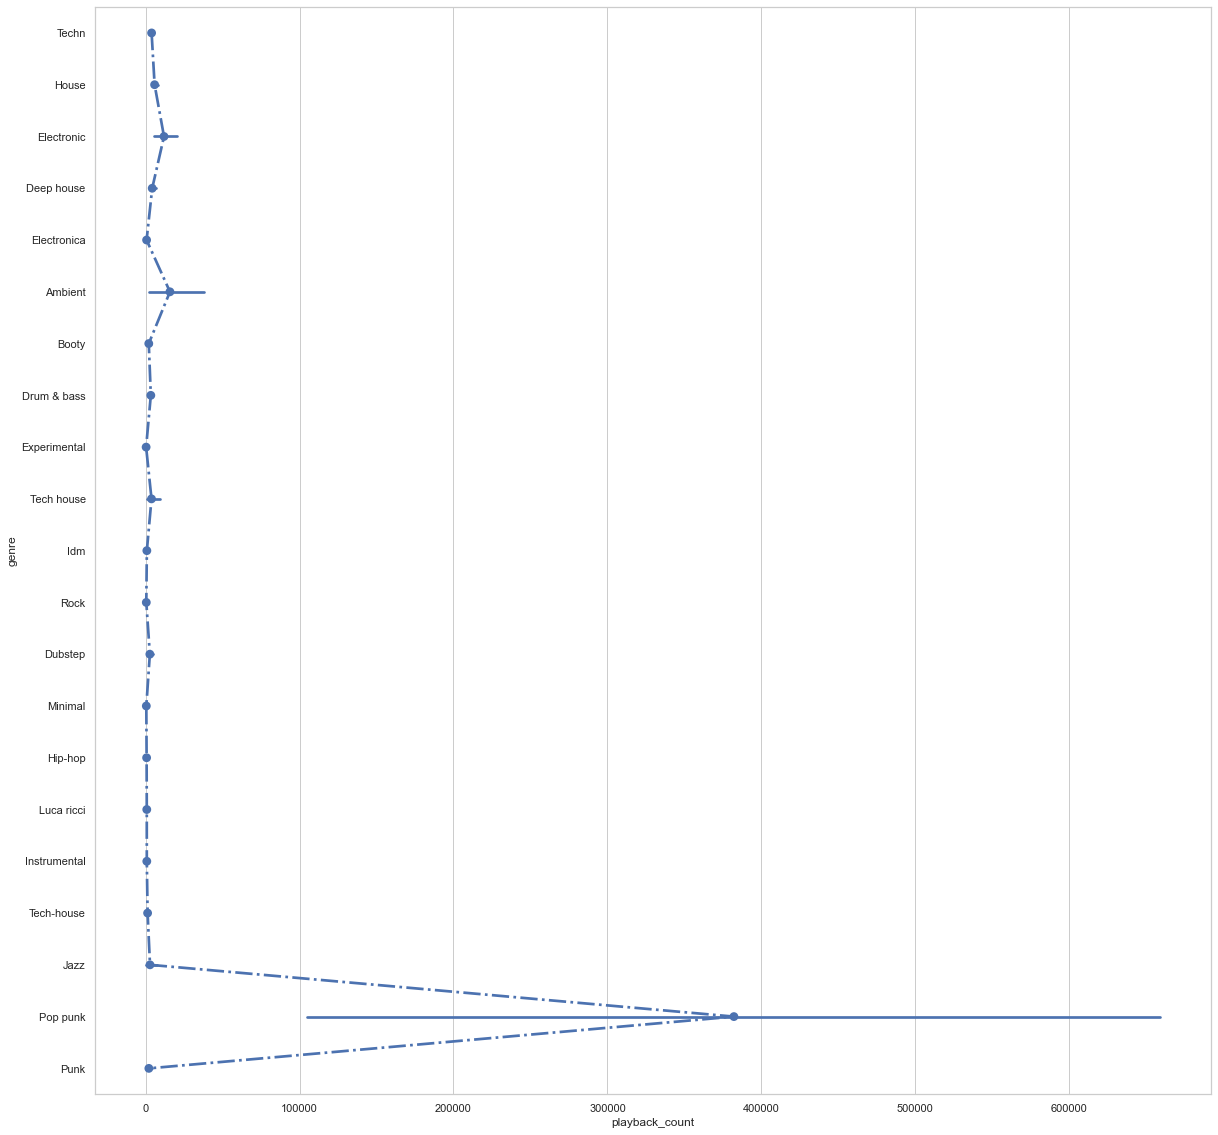

In [35]:
plt.figure(figsize=(20, 20))
sns.set_theme(style="whitegrid")
sns.pointplot(data=frequent_genre_df, x="playback_count", y="genre",linestyles = '-.');
# sns.boxplot(x='playback_count',y='genre',data=frequent_genre_df);

Từ biểu đồ, ta có thể thấy thể loại nhạc Pop punk có số lượt nghe trung bình nhiều nhất.

**Trả lời cho câu hỏi đã đặt ra:** Thể loại nhạc của track phổ biến trên Soundcloud có lượt nghe trung bình nhiều nhất là **Pop punk**.

## **Câu 2: Thành phố nào "nổi tiếng" nhất trên Soundcloud?**

1. Với từng thành phố thì các thông số của user như followers, likes hay comments đều khác nhau, vậy liệu khu vực sống có ảnh hưởng đến sự "nổi tiếng" của các user hay không?
2. User nào là người có lượt follow, like, comment cao nhất? Có thể xuất ra thông tin của "Super Idol" đó cho mọi người biết

**Trả lời được các câu hỏi này** giúp ta nắm bắt được những thành phố đang có sự phát triển âm nhạc lớn trên thế giới. Từ thông tin đó, ta có thể xác định được những thành phố "đáng sống" cho các user nhất để họ cân nhắc nếu muốn hoạt động của mình được nhiều người biết đến, đồng thời các user cũng có thể biết và học hỏi từ những người thành công nhất.

**Để trả lời được câu hỏi trên** ta dựa vào cột **city** và các cột **followers_count**, **comments_count** và **likes_count**


### Dữ liệu thu thập được

In [36]:
user_df.head()

,city,comments_count,country_code,created_at,creator_subscriptions,creator_subscription,followers_count,followings_count,groups_count,kind,last_modified,likes_count,playlist_likes_count,playlist_count,track_count,verified,badges
id,,,,,,,,,,,,,,,,,
183,Berlin,463,DE,2007-09-22 14:21:00+00:00,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},133673,1270,0,user,2020-12-16 21:40:33+00:00,306,10,4,26,True,"{'pro': False, 'pro_unlimited': False, 'verifi..."
1691,Tokyo,0,JP,2008-03-06 12:56:42+00:00,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},265,5,0,user,2020-08-17 12:33:59+00:00,3,0,3,5,False,"{'pro': False, 'pro_unlimited': False, 'verifi..."
2157,Tampere,241,FI,2008-04-19 17:43:00+00:00,[{'product': {'id': 'creator-pro-unlimited'}}],{'product': {'id': 'creator-pro-unlimited'}},1502,2002,0,user,2021-08-17 10:55:32+00:00,826,54,5,73,False,"{'pro': False, 'pro_unlimited': True, 'verifie..."
1719,NaN,0,NaN,2008-03-08 00:32:42+00:00,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},877,6,0,user,2017-09-07 21:15:46+00:00,1,0,4,46,False,"{'pro': False, 'pro_unlimited': False, 'verifi..."
2455,Borlänge,9,SE,2008-05-14 19:44:36+00:00,[{'product': {'id': 'free'}}],{'product': {'id': 'free'}},209,46,0,user,2015-10-18 13:05:36+00:00,33,5,4,29,False,"{'pro': False, 'pro_unlimited': False, 'verifi..."


In [37]:
user_df.shape

(694, 17)

### Phân tích một chút về các thông số của user

Liệu những thông số về followers, comments và likes có liên hệ với nhau không?

In [38]:
user_val = user_df.select_dtypes(include = ['float64', 'int64'])
user_val = user_val.drop(columns=['groups_count']) #giá trị groups_count toàn bằng 0 nên ta bỏ qua
user_val.describe().T

,count,mean,std,min,25%,50%,75%,max
comments_count,694.0,68.302594,212.330491,0.0,0.0,4.5,35.00,2732.0
followers_count,694.0,2819.923631,16539.639381,0.0,24.0,105.5,663.50,330992.0
followings_count,694.0,204.332853,399.018818,0.0,4.0,37.5,182.50,2030.0
likes_count,694.0,106.613833,540.712248,0.0,0.0,6.0,51.75,10544.0
playlist_likes_count,694.0,5.557637,23.525038,0.0,0.0,0.0,2.00,350.0
playlist_count,694.0,6.272334,16.780199,1.0,1.0,2.0,5.00,250.0
track_count,694.0,34.580692,85.398455,0.0,4.0,11.0,29.00,1223.0


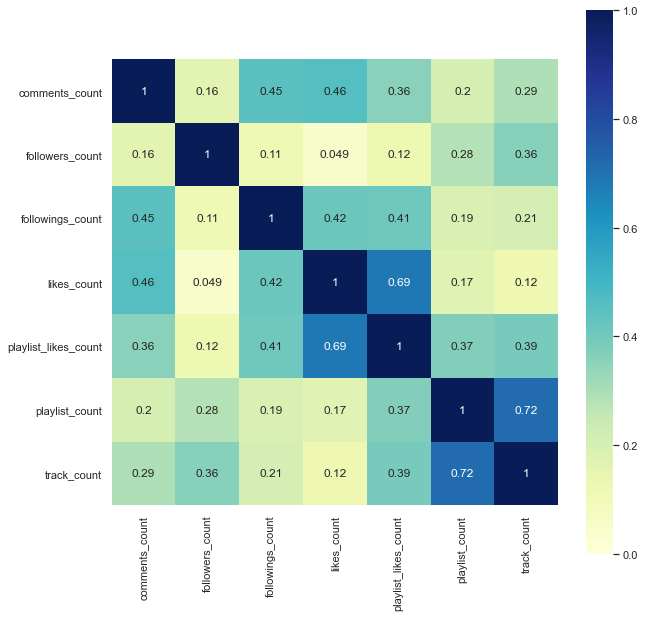

In [39]:
user_corr = user_val.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(user_corr,cmap="YlGnBu",vmin=0, annot=True, square=True);

### Kiểm tra cột followers, comments và likes

In [41]:
#Kiểm tra xem các cột có phải dạng số hết chưa
print(user_df['followers_count'].dtype)
print(user_df['comments_count'].dtype)
print(user_df['likes_count'].dtype)

int64
int64
int64


In [42]:
#liệu có giá trị NaN nào không ?
user_df['followers_count'].isnull().values.any()

False

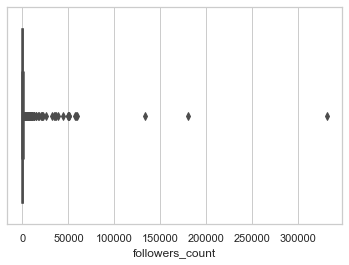

In [48]:
sns.boxplot(data=user_val, x='followers_count');

Cột followers_count đa số ở khoảng 0-600000 followers, nhưng vẫn có người có tới hơn 325000, lát nữa tìm user có số follow cao nhất sẽ chứng minh điều này.

In [43]:
user_df['comments_count'].isnull().values.any()

False

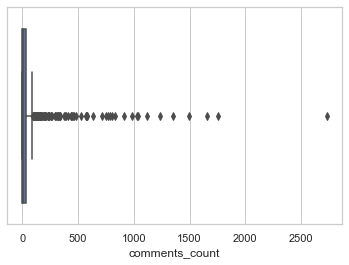

In [46]:
sns.boxplot(data=user_val, x='comments_count');

Cột comments_count đa số ở khoảng dưới 2000 comments, nhưng vẫn có người có tới hơn 2500, lát nữa tìm user có số comment cao nhất sẽ chứng minh điều này.

In [44]:
user_df['likes_count'].isnull().values.any()

False

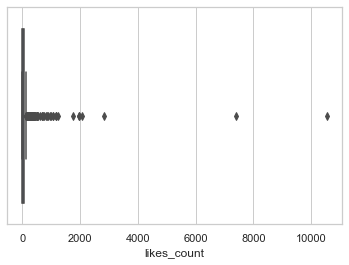

In [45]:
sns.boxplot(data=user_val, x='likes_count');

Cột likes_count đa số ở khoảng 0-3000 like, nhưng vẫn có người có tới hơn 10000, lát nữa tìm user có số like cao nhất sẽ chứng minh điều này.

### Kiểm tra cột city

In [46]:
user_df['city']

id
183               Berlin
1691               Tokyo
2157             Tampere
1719                 NaN
2455            Borlänge
              ...       
60008         middletown
7036         Los Angeles
35131             Geneva
60037    Minneapolis, MN
647            Stockholm
Name: city, Length: 694, dtype: object

In [47]:
user_df['city'].isnull().values.any()

True

Một vài dòng có giá trị NaN, ta cần loại bỏ các dòng này

In [48]:
user_df.dropna(subset=['city'], how='all', inplace=True, axis = 0)
user_df['city']

id
183               Berlin
1691               Tokyo
2157             Tampere
2455            Borlänge
231            Stockholm
              ...       
60008         middletown
7036         Los Angeles
35131             Geneva
60037    Minneapolis, MN
647            Stockholm
Name: city, Length: 556, dtype: object

Giờ hãy thử tính toán và vẽ biểu đồ cho từng giá trị xét

### Thành phố có tổng lượt follow của user cao nhất trên Soundcloud

In [49]:
df_followers_count = user_df.groupby("country_code",axis=0).sum()
df_followers_count.sort_values(by = "followers_count",ascending=False,axis=0,inplace=True)
df_followers_count = df_followers_count.head(10)
df_followers_count = df_followers_count["followers_count"]

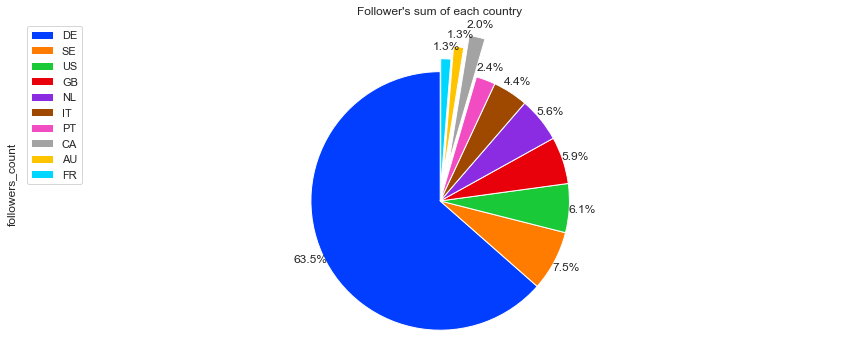

In [50]:
explode_list=[0,0,0,0,0,0,0,0.3,0.2,0.1]
df_followers_count.plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,labels=None,pctdistance=1.1
                            ,explode=explode_list,colors = sns.color_palette('bright')[0:10])
plt.title("Follower's sum of each country")
plt.axis('equal')
plt.legend(labels=df_followers_count.index,loc='upper left');

Đức là quốc gia có nhiều lượt follow nhất (63,5%) và bỏ xa các quốc gia khác

### Thành phố có tổng lượt comment của user cao nhất trên Soundcloud

In [51]:
df_comments_count = user_df.groupby("country_code",axis=0).sum()
df_comments_count.sort_values(by="comments_count",ascending=False,axis=0,inplace=True)
df_comments_count = df_comments_count.head(10)
df_comments_count = df_comments_count["comments_count"]

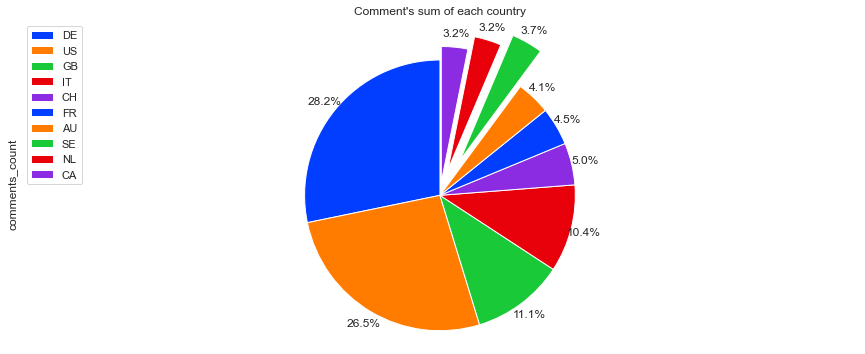

In [52]:
explode_list=[0,0,0,0,0,0,0,0.3,0.2,0.1]
df_comments_count.plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,labels=None,pctdistance=1.1
                            ,explode=explode_list,colors = sns.color_palette('bright')[0:5])
plt.title("Comment's sum of each country")
plt.axis('equal')
plt.legend(labels=df_comments_count.index,loc='upper left');

Đức là quốc gia có nhiều lượt comment nhất (28,2%), theo sát đó là Mỹ (26,5%)

### Thành phố có tổng lượt like của user cao nhất trên Soundcloud

In [53]:
df_likes_count = user_df.groupby("country_code",axis=0).sum()
df_likes_count.sort_values(by="likes_count",ascending=False,axis=0,inplace=True)
df_likes_count = df_likes_count.head(10)
df_likes_count = df_likes_count["likes_count"]

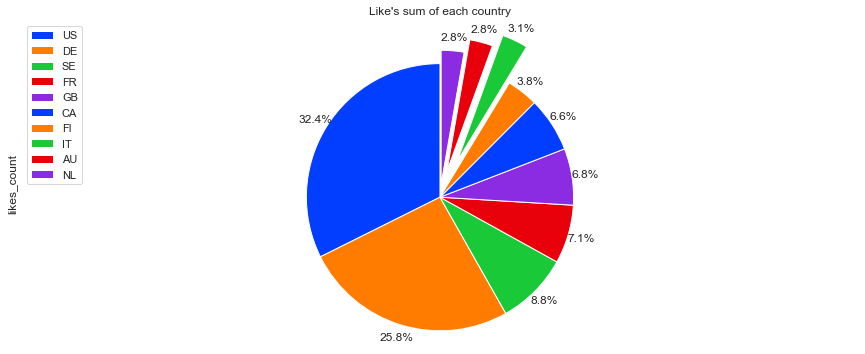

In [54]:
explode_list=[0,0,0,0,0,0,0,0.3,0.2,0.1]
df_likes_count.plot(kind='pie',figsize=(15,6),autopct="%1.1f%%", startangle=90, labels=None, pctdistance=1.1
                            , explode=explode_list, colors = sns.color_palette('bright')[0:5])
plt.title("Like's sum of each country")
plt.axis('equal')
plt.legend(labels=df_likes_count.index,loc='upper left');

Bất ngờ khi Mỹ là quốc gia có nhiều lượt comment nhất (32,4%), theo sát đó là Đức (25,8%)

### User có lượt follow cao nhất trên Soundcloud

In [55]:
#lượt like cao nhất
user_df.loc[user_df['followers_count'].idxmax()]

city                                                                Berlin
comments_count                                                         215
country_code                                                            DE
created_at                                       2007-07-30 22:18:00+00:00
creator_subscriptions       [{'product': {'id': 'creator-pro-unlimited'}}]
creator_subscription          {'product': {'id': 'creator-pro-unlimited'}}
followers_count                                                     330992
followings_count                                                       246
groups_count                                                             0
kind                                                                  user
last_modified                                    2020-11-19 16:15:39+00:00
likes_count                                                             57
playlist_likes_count                                                     5
playlist_count           

### User có lượt comment cao nhất trên Soundcloud

In [56]:
#lượt like cao nhất
user_df.loc[user_df['comments_count'].idxmax()]

city                                                              Brooklyn
comments_count                                                        2732
country_code                                                            US
created_at                                       2008-10-27 03:20:24+00:00
creator_subscriptions                        [{'product': {'id': 'free'}}]
creator_subscription                           {'product': {'id': 'free'}}
followers_count                                                       2420
followings_count                                                      2000
groups_count                                                             0
kind                                                                  user
last_modified                                    2021-11-22 07:17:03+00:00
likes_count                                                           7411
playlist_likes_count                                                   104
playlist_count           

### User có lượt like cao nhất trên Soundcloud

In [57]:
#lượt like cao nhất
user_df.loc[user_df['likes_count'].idxmax()]

city                                                        Taipei, Taiwan
comments_count                                                         119
country_code                                                           NaN
created_at                                       2008-11-03 09:33:57+00:00
creator_subscriptions                        [{'product': {'id': 'free'}}]
creator_subscription                           {'product': {'id': 'free'}}
followers_count                                                       3811
followings_count                                                      1790
groups_count                                                             0
kind                                                                  user
last_modified                                    2018-08-26 06:18:35+00:00
likes_count                                                          10544
playlist_likes_count                                                   291
playlist_count           

### Kết luận

1. Vậy như đã thấy, Đức là quốc gia "đáng sống" nhất cho các user để phát triển hoạt động của họ, nhưng chỉ xét riêng về lượt comment và like thì Mỹ sẽ nhiều hơn, có vẻ họ thích đánh giá, tương tác nhiều hơn là follow( nghe có vẻ không tốt :-) )
2. Hmm, 3 người ở 3 nơi khác nhau, có vẻ ở đâu ta cũng có thể phát triển hoạt động của mình.